<font size="6"> 
Final Project

<font size="3"> 
Group Members: Winni Weng, Simren Kochhar, Justin Ryu, and Coralynn Yang;
Group 32;
QTM 151 8:30am Mon/Wed

<font size="4"> 
Introduction:

1-2 paragraphs summarizing the main gaols of the project. First paragraph should briefly descibe what Formula 1 is, what question you are interested in, and why it is relevant. The introduction should end with a high-level description of the results and the coming structure of the project. Try to make the text self-contained, intended for someone who isn't familiar with Formula 1 or the dataset. 

<font size="4"> 
Data-description: 

1 paragraph describing what data tables you are using. State which each row represents, how many obserbations are contained in each table, the years, and a brief overview of the data that is contained there

* Write a paragraph in markdown summarizing data cleaning procedures
* Write a paragraph describing any merging procedures
* Write a paragraph describing your main columns: 

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read necessary datasets

drivers = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv")
pit_stops = pd.read_csv("data_raw/pit_stops.csv")

<font size="4"> 
Data Cleaning:

Replace \\\N values in the milliseconds column (representing time to complete a race) in the results dataset with the np.nan value so that it can easily be dealt with in our analyses.

In [3]:
#replacing \\N with NaN and converting milliseconds to numeric
subset_times=results.query("milliseconds.str.isnumeric() == False")
list_unique_times=pd.unique(subset_times["milliseconds"])
print(list_unique_times)

results["milliseconds"]=results["milliseconds"].replace('\\N', np.nan)
results["milliseconds"]=pd.to_numeric(results["milliseconds"])


['\\N']


Replace \\\N values in the rank column in the results dataset with the np.nan value so that it can easily be dealt with in our analyses.

In [4]:
#replacing \\N with NaN and converting rank to numeric
subset_rank=results.query("rank.str.isnumeric() == False")
list_unique_rank=pd.unique(subset_rank["rank"])
print(list_unique_rank)
results["rank"]=results["rank"].replace('\\N', np.nan)
results["rank"]=pd.to_numeric(results["rank"])

['\\N']


<font size="4"> 
Renaming & Merging:

Rename the milliseconds column in the results and pit_stops dataset to be more descriptive so that when we merge them we can clearly identify what each column represents.

In [ ]:
#Rename the milliseconds column in pit_stops so that they can be merged clearly
results = results.rename(columns={'milliseconds':'finishing_time_milliseconds'})
pit_stops = pit_stops.rename(columns={'milliseconds':'pit_stop_milliseconds'})

First merge the results dataset into the drivers dataset based on driverId. After that merge the column for pit stop times from the pit_stops dataset into the newley merged dataset of drivers and results. This produes a final dataset that we will work with that contains driver information (including nationality), results, and pit stop time for each driver per race.

In [5]:
#First merge drivers and results
merge_driverResults = pd.merge(drivers,
                         results,
                         on = "driverId",
                         how = "left")

#Next merge merge_driverTimes and the relevant column from pit_stop (time for pitstop in milliseconds)
driver_results_stops_merge = pd.merge(merge_driverResults,
                         pit_stops[["driverId","raceId","pit_stop_milliseconds"]],
                         on = ["driverId","raceId"],
                         how = "left")

driver_results_stops_merge

,driverId,driverRef,number_x,code,forename,surname,dob,nationality,url,resultId,...,points,laps,time,finishing_time_milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,pit_stop_milliseconds
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,10.0,58.0,1:34:50.616,5690616.0,39,2.0,1:27.452,218.300,1.0,NaN
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27.0,...,4.0,56.0,+46.548,5525103.0,53,3.0,1:35.462,209.033,1.0,NaN
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,57.0,...,0.0,56.0,\N,NaN,25,19.0,1:35.520,203.969,11.0,NaN
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69.0,...,6.0,66.0,+4.187,5903238.0,20,3.0,1:22.017,204.323,1.0,NaN
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,90.0,...,8.0,58.0,+3.779,5213230.0,31,2.0,1:26.529,222.085,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30770,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25837.0,...,0.0,57.0,\N,NaN,53,8.0,1:29.600,212.183,11.0,22435.0
30771,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25837.0,...,0.0,57.0,\N,NaN,53,8.0,1:29.600,212.183,11.0,23159.0
30772,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,25714.0,...,2.0,53.0,+7.122,4834633.0,41,13.0,1:26.624,240.750,1.0,24628.0
30773,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font size="4"> 
Descriptive Statistics of Columns of Interest:

The code below computes aggregate descriptive statistcs by nationality. In particular it computes the average finishing time, standard deviation of finishing time, mean pit stop time, average points, and average rank. These are all metrics that tell us about how good the country is as well as their average pit stop amount which is a metric we examine later in relation to how good a country is. Furthermore, we create a table of the top 10 nationalities for further analysis.

In [6]:
fastest_by_nationality=(driver_results_stops_merge.groupby("nationality")
                 .agg(mean_race_times=("finishing_time_milliseconds", "mean"), 
                      sd_race_times=("finishing_time_milliseconds", "std"), 
                      mean_pit_stop_time =   ('pit_stop_milliseconds','mean'),
                      avg_points=("points", "mean"), 
                      avg_rank=("rank", "mean")))

#Columbian F1 drivers have the fastest average times and have the lowest average rank
top_10_byNat = fastest_by_nationality.sort_values(by="avg_rank", ascending=True).head(10)
display(top_10_byNat)


,mean_race_times,sd_race_times,mean_pit_stop_time,avg_points,avg_rank
nationality,,,,,
Colombian,5.382080e+06,3.809739e+05,NaN,2.456000,6.023810
Monegasque,5.968754e+06,1.226128e+06,118787.307692,7.517073,6.903409
Finnish,5.900137e+06,1.022613e+06,76918.589744,4.344839,8.214639
Dutch,6.061278e+06,1.302862e+06,76160.821637,5.909299,8.215496
Australian,6.259461e+06,1.342916e+06,72766.555944,4.556900,8.433048
British,6.289251e+06,1.410350e+06,74041.205551,3.121971,8.839469
Spanish,6.132715e+06,1.383124e+06,79965.876984,4.301501,9.026971
German,5.991878e+06,1.270068e+06,62824.451832,4.153664,9.388103
Mexican,6.099101e+06,1.128296e+06,76748.116928,3.264336,9.407470


<font size="4"> 
Results:

The below code is to find information about the individual best drivers based on their avg_points. We see that the top 3 Formula1 drivers are Hamilton, Max_Verstappen, and Vettel, and they are British, Dutch, and German respectivley. All of these nationalities that these divers belong to are in the top 10 overall nationalities as sorted above. This is interesting as it shows as that the top few drivers are not miracle standouts but come from countries with strong overall performances.

In [15]:
#finding the indvidual best drivers (most average points) and where they are from

fastest_indiv=(driver_results_stops_merge.groupby("driverRef")
                 .agg(mean_race_times=("finishing_time_milliseconds", "mean"), 
                      avg_points=("points", "mean"), 
                      avg_rank=("rank", "mean"), 
                      nationality=("nationality","first")))

fastest_indiv.sort_values(by="avg_points", ascending=False).head(10)

,mean_race_times,avg_points,avg_rank,nationality
driverRef,,,,
hamilton,6.011914e+06,14.670620,4.391941,British
max_verstappen,6.021312e+06,12.532573,4.879479,Dutch
vettel,6.047990e+06,11.192950,5.852336,German
rosberg,6.046518e+06,8.952035,6.773529,German
leclerc,5.968754e+06,8.732955,6.903409,Monegasque
bottas,6.076755e+06,8.126685,7.037736,Finnish
webber,5.977558e+06,6.724422,6.927203,Australian
alonso,6.024720e+06,6.500000,7.335249,Spanish
george_amick,1.348143e+07,6.000000,NaN,American


The below code plots the mean finishing time (x-axis) vs the mean pit stop time (y-axis) in a scatter plot where each point represents the aggregate statistics for a particular nationality. It plots this for both the top 10 and bottom 10 nationalities (that have data for pit stops as not all of them do). This will give us a relation between if faster pit stop times seem to also correlate with faster lap times. 

Based on the graph, it seems like having a pit stop time in the higher range (60,000 - 120,000 milliseconds) actually correlates to faster overall race times. This is interesting as teams who are not performing well may want to look into investing more time in making sure their car is in good shape.

,mean_race_times,sd_race_times,mean_pit_stop_time,avg_points,avg_rank
nationality,,,,,
Venezuelan,6.134983e+06,6.400186e+05,30241.158974,0.653846,12.052381
French,6.138409e+06,1.215194e+06,75508.853579,1.286266,12.326810
Canadian,6.081393e+06,1.313003e+06,117818.150307,1.187809,12.487871
Japanese,6.184019e+06,1.681466e+06,100649.165803,0.530447,12.534483
Swiss,6.611134e+06,2.102781e+06,24024.317073,0.713462,12.733333
New Zealander,7.136483e+06,1.315193e+06,23993.911765,1.328049,13.025641
Italian,6.393882e+06,1.941482e+06,88226.566845,0.586130,13.473054
Swedish,6.253615e+06,9.781815e+05,45499.676136,0.686144,14.473118
Belgian,6.415504e+06,1.201048e+06,36787.284404,0.659409,15.008772


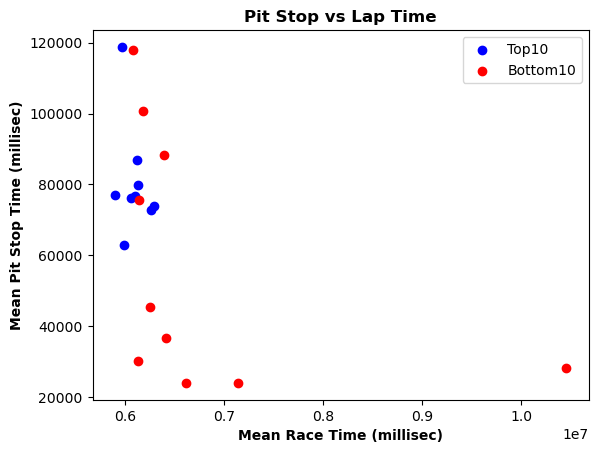

In [26]:
#Compute the bottom 10 fastest nationalities
bottom_10_byNat = fastest_by_nationality.dropna().sort_values(by="avg_rank", ascending=True).tail(10)
display(bottom_10_byNat)

#Plot the mean finishing time vs mean pit stop time. 
plt.scatter(x = top_10_byNat["mean_race_times"],y=top_10_byNat["mean_pit_stop_time"],color="blue")
plt.scatter(x = bottom_10_byNat["mean_race_times"],y=bottom_10_byNat["mean_pit_stop_time"],color="red")
plt.legend(["Top10","Bottom10"])
plt.xlabel("Mean Race Time (millisec)",fontweight="bold")
plt.ylabel("Mean Pit Stop Time (millisec)",fontweight="bold")
plt.title("Pit Stop vs Lap Time",fontweight="bold")
plt.show()

<font size="4"> 
Discussion: 

A brief one paragraph summarizing findings. Describe the main things you learned from the data